In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from scipy.io import loadmat
import os
from PIL import Image

In [2]:
dataset, info = tfds.load("oxford_flowers102", with_info=True, as_supervised=True)

In [23]:
print(info.features["label"].names)
print(info.features['label'].num_classes)

['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower', 'pelargonium', 'bishop of llandaff', 'gaura', 'geranium', 'orange dahlia', 'pink-yellow dahlia?', 'ca

water lily
desert-rose
gazania
wild pansy
oxeye daisy


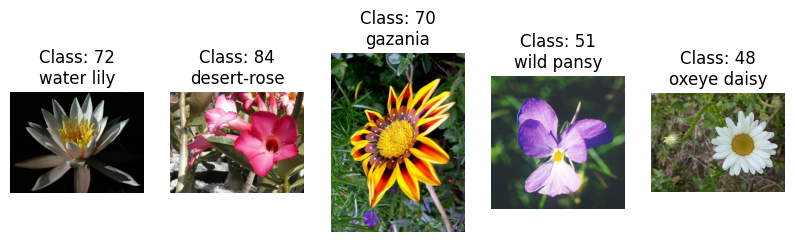

In [11]:
train_dataset = dataset["train"]

plt.figure(figsize=(10, 5))
for i, (image, label) in enumerate(train_dataset.take(5)): 
    plt.subplot(1, 5, i + 1)
    plt.imshow(image.numpy())
    print(info.features["label"].names[label.numpy()])
    plt.title(f"Class: {label.numpy()}\n{info.features['label'].names[label.numpy()]}")
    plt.axis("off")

plt.show()

In [38]:
class_names = info.features["label"].names
label_mapping = {i: name for i, name in enumerate(class_names)}
all_labels = [(label.numpy(), label_mapping[label.numpy()]) for _, label in train_dataset]
unique_labels = {(label.numpy(), label_mapping[label.numpy()]) for _, label in train_dataset}
dataset = pd.DataFrame(sorted(unique_labels), columns=["Label Number", "Label Name"],index=None)
dataset.head()


,Label Number,Label Name
0,0,pink primrose
1,1,hard-leaved pocket orchid
2,2,canterbury bells
3,3,sweet pea
4,4,english marigold


In [39]:
dataset.to_csv('lables.csv',index=False)

In [2]:
data_set = loadmat("imagelabels.mat")
print(data_set.keys())

dict_keys(['__header__', '__version__', '__globals__', 'labels'])


In [27]:
LabeldataSet = data_set['labels'][0]
a = [x for x in LabeldataSet if x == 85]
len(a)

63

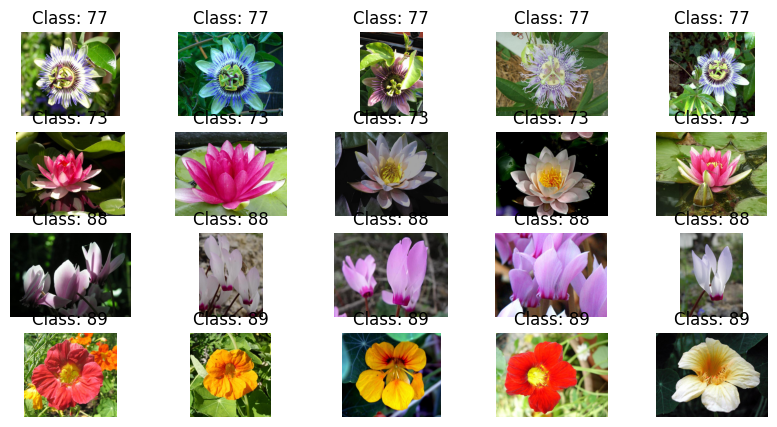

In [37]:
plt.figure(figsize=(10, 5))
repeat = 1
plot_count = 1
CurrentclassNum = LabeldataSet[0]
for i, image in enumerate(os.listdir('102flowers')):
    if repeat <= 5 and CurrentclassNum == LabeldataSet[i]:
        plt.subplot(4, 5, plot_count)
        image_path = os.path.join('102flowers',image)
        imageForShow = Image.open(image_path)
        plt.imshow(imageForShow)
        plt.title(f"Class: {LabeldataSet[i]}")
        plt.axis("off")
        plot_count += 1

    repeat += 1

    if CurrentclassNum != LabeldataSet[i]:
        repeat = 1
        CurrentclassNum = LabeldataSet[i]

    if plot_count > 20:
        break

In [43]:
lables_name = pd.read_csv('lables.csv')
lables_name.head()

,Label Number,Label Name
0,0,pink primrose
1,1,hard-leaved pocket orchid
2,2,canterbury bells
3,3,sweet pea
4,4,english marigold


In [44]:

print(lables_name['Label Name'][77])

lotus


In [ ]:
CurrentclassNum = LabeldataSet[0]

for i, image in enumerate(os.listdir('102flowers')):
    if CurrentclassNum == LabeldataSet[i]:
        if not os.path.isdir(lables_name['Label Name'][CurrentclassNum]):
            image_path = os.path.join(lables_name['Label Name'][CurrentclassNum])
            os.makedirs('image_path')
        

In [3]:
def filter_images_by_labels(labels, images, target_labels={101, 102}):
    """
    فیلتر کردن تصاویر بر اساس لیبل‌های مشخص شده (۱۰۱ و ۱۰۲)
    :param labels: لیست لیبل‌ها
    :param images: لیست تصاویر
    :param target_labels: مجموعه‌ای از لیبل‌های مورد نظر
    :return: لیست جدید شامل تصاویر با لیبل‌های مشخص‌شده
    """
    unseen = [[img,lbl] for lbl, img in zip(labels, images) if lbl in target_labels]
    seen = [img for lbl, img in zip(labels, images) if lbl not in target_labels]
    return unseen, seen

# مثال استفاده:
labels = [100, 101, 102, 103, 101, 105, 102]
images = ['img1', 'img2', 'img3', 'img4', 'img5', 'img6', 'img7']

unseen,seen  = filter_images_by_labels(labels, images)
print(unseen)  # خروجی: ['img2', 'img3', 'img5', 'img7']
print(seen) 


[['img2', 101], ['img3', 102], ['img5', 101], ['img7', 102]]
['img1', 'img4', 'img6']


In [2]:
import numpy as np
arr = np.arange(12) + 1
print(arr)
mask = np.ones(len(arr), dtype=bool)
print(mask)
mask[[0,2,4]] = False
print(mask)
result = arr[mask,...]
print(result)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ True  True  True  True  True  True  True  True  True  True  True  True]
[False  True False  True False  True  True  True  True  True  True  True]
[ 2  4  6  7  8  9 10 11 12]


In [ ]:
import os
import pandas as pd
from scipy.io import loadmat
images = os.listdir('102flowers')
text_lables = pd.read_csv('Oxford-102_Flower_dataset_labels.csv')
matlabels = loadmat('imagelabels.mat')
labels = matlabels['labels'][0]

In [28]:
lenth = len(labels)
print(lenth-90)
print(lenth)
labels[lenth-90:lenth+1]

8099
8189


array([ 7,  7,  7,  7,  7,  6,  6,  6,  6,  6,  6,  6, 93, 93, 93, 93, 93,
       93, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62,
       62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62,
       62, 62, 62, 62, 62], dtype=uint8)

In [30]:
a_labels = [ 7,  7,  7,  7,  7,  6,  6,  6,  6,  6,  6,  6, 93, 93, 93, 93, 93,
       93, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62,
       62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62,
       62, 62, 62, 62, 62]

def get_last_unique_labels1(labels, n=2):
    unique_labels = sorted(set(labels))  # حذف مقادیر تکراری و مرتب‌سازی
    return unique_labels[-n:]

def get_last_unique_labels2(labels, n=2):
    unique_labels = []
    for label in reversed(labels):  # پیمایش لیست از انتها
        if label not in unique_labels:
            unique_labels.append(label)
        if len(unique_labels) == n:
            break
    return list(reversed(unique_labels))  # بازگرداندن ترتیب اصلی

last_unique_labels = get_last_unique_labels1(a_labels)
print(last_unique_labels)

last_unique_labels = get_last_unique_labels2(a_labels)
print(last_unique_labels)


[62, 93]
[57, 62]


In [31]:
def split_labels_and_images(labels, images, target_labels={57, 62}):
    """
    جداسازی لیبل‌های 57 و 62 از بقیه لیبل‌ها همراه با تصاویر معادلشان
    :param labels: لیست لیبل‌ها
    :param images: لیست تصاویر
    :param target_labels: لیبل‌هایی که باید جدا شوند
    :return: (لیبل‌های 7، 6، 93 و تصاویر معادلشان), (لیبل‌های 57، 62 و تصاویر معادلشان)
    """
    group1_labels, group1_images = [], []  # برای لیبل‌های 7، 6، 93
    group2_labels, group2_images = [], []  # برای لیبل‌های 57، 62

    for lbl, img in zip(labels, images):
        if lbl in target_labels:
            group2_labels.append(lbl)
            group2_images.append(img)
        else:
            group1_labels.append(lbl)
            group1_images.append(img)

    return (group1_labels, group1_images), (group2_labels, group2_images)

# نمونه داده‌ها
a_labels = [7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 93, 93, 93, 93, 93, 93, 
            57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 
            57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 
            62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 
            62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 
            62, 62, 62, 62, 62, 62, 62, 62]

a_images = [f"img{i}" for i in range(len(a_labels))]  # شبیه‌سازی لیست تصاویر

# اجرای تابع
(group1, images1), (group2, images2) = split_labels_and_images(a_labels, a_images)

# نمایش نتایج
print("لیبل‌های 7، 6، 93:", group1)
print("تصاویر معادل آن‌ها:", images1)
print("لیبل‌های 57 و 62:", group2)
print("تصاویر معادل آن‌ها:", images2)


لیبل‌های 7، 6، 93: [7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 93, 93, 93, 93, 93, 93]
تصاویر معادل آن‌ها: ['img0', 'img1', 'img2', 'img3', 'img4', 'img5', 'img6', 'img7', 'img8', 'img9', 'img10', 'img11', 'img12', 'img13', 'img14', 'img15', 'img16', 'img17']
لیبل‌های 57 و 62: [57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62]
تصاویر معادل آن‌ها: ['img18', 'img19', 'img20', 'img21', 'img22', 'img23', 'img24', 'img25', 'img26', 'img27', 'img28', 'img29', 'img30', 'img31', 'img32', 'img33', 'img34', 'img35', 'img36', 'img37', 'img38', 'img39', 'img40', 'img41', 'img42', 'img43', 'img44', 'img45', 'img46', 'img47', 'img48', 'img49', 'img50', 'img51', 'img52', 'img53', 'img54', 'img55', 'img56', 'img57', 'img58', 'img59', 'img60', 'img61', 'img62', 'img63', 'img6

In [32]:
a =[1,2,3,4,5,6]
a = a + [9]
a


[1, 2, 3, 4, 5, 6, 9]

In [47]:
def get_last_unique_labels(labels, n=2):
    unique_labels = []
    for label in reversed(labels):
        if label not in unique_labels:
            unique_labels.append(label)
        if len(unique_labels) == n:
            break
    return list(reversed(unique_labels))

In [48]:
def remove_57_62_labels(images, labels):
    unseen_label = get_last_unique_labels(labels)
    unseen_images = []
    unseen_images = [[img, lbl] for lbl, img in zip(labels, images) if lbl in unseen_label]
    seen_images = [img for lbl, img in zip(labels, images) if lbl not in unseen_label]
    return seen_images , unseen_images

In [ ]:
from tqdm import tqdm
from time import sleep

# for i in tqdm(range(50)):
#     sleep(0.25)

a_images = [f"img{i}" for i in range(50)] 
for i,j in tqdm(enumerate(a_images), total=len(a_images)):
    sleep(0.25)


In [9]:
import tensorflow as tf

# داده‌های نمونه
data = [
    [1.0, 2.0],  # ویژگی‌ها
    [3.0, 4.0],
    [5.0, 6.0]
]

labels = [
    0,  # برچسب‌ها
    1,
    0
]

# تبدیل داده‌ها به Dataset
class CustomDataLoader(tf.data.Dataset):
    def __new__(cls):
        return tf.data.Dataset.from_tensor_slices((data, labels))

# بارگذاری داده‌ها
dataset = CustomDataLoader()

# ایجاد DataLoader برای بچ‌های داده‌ها
batch_size = 2
dataset = dataset.batch(batch_size)

# پیمایش داده‌ها
for batch_data, batch_labels in dataset:
    print("Data:", batch_data.numpy())
    print("Labels:", batch_labels.numpy())


Data: [[1. 2.]
 [3. 4.]]
Labels: [0 1]
Data: [[5. 6.]]
Labels: [0]


In [ ]:
import tensorflow as tf
import numpy as np

class CustomDataLoader(tf.keras.utils.Sequence):
    def __init__(self, data, labels, batch_size):
        self.data = data
        self.labels = labels
        self.batch_size = batch_size
        self.indexes = np.arange(len(data))  # ایندکس‌ها برای پیمایش داده‌ها
        self.on_epoch_end()

    def __len__(self):
        """
        تعداد بچ‌ها در یک اپوک را برمی‌گرداند.
        """
        return int(np.floor(len(self.data) / self.batch_size))

    def __getitem__(self, index):
        """
        یک بچ از داده‌ها را با توجه به ایندکس دریافت می‌کند.
        """
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_data = [self.data[i] for i in batch_indexes]
        batch_labels = [self.labels[i] for i in batch_indexes]
        
        # تبدیل داده‌ها به قالب TensorFlow
        return np.array(batch_data), np.array(batch_labels)

    def _generate_batch(self, batch_indexes):
        """
        یک متد خصوصی برای تولید بچ‌ها.
        """
        batch_data = [self.data[i] for i in batch_indexes]
        batch_labels = [self.labels[i] for i in batch_indexes]
        return np.array(batch_data), np.array(batch_labels)

    def on_epoch_end(self):
        """
        این متد بعد از هر اپوک برای به هم زدن داده‌ها فراخوانی می‌شود.
        """
        # به هم زدن ایندکس‌ها برای جلوگیری از ترتیب ثابت
        np.random.shuffle(self.indexes)


# داده‌های نمونه
data = np.random.random((100, 10))  # 100 نمونه، 10 ویژگی
labels = np.random.randint(0, 2, 100)  # 100 برچسب (0 یا 1)

# پارامترها
batch_size = 16

# ایجاد DataLoader
data_loader = CustomDataLoader(data, labels, batch_size)

# پیمایش داده‌ها در بچ‌ها
for batch_data, batch_labels in data_loader:
    print("Batch Data Shape:", batch_data.shape)
    print("Batch Labels Shape:", batch_labels.shape)
